In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#data = yf.download('EURJPY=X', period='1mo', interval='1h')

data = yf.download('EURJPY=X', period='10y')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.shape

(2607, 6)

In [4]:
#checking missing values

data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
#check for duplicated values

data.duplicated().sum()

0

In [6]:
#sort data by their index value

data.sort_index()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-03,132.279007,133.173996,132.121002,132.250000,132.250000,0
2013-10-04,132.488007,132.645004,131.781006,132.481995,132.481995,0
2013-10-07,131.960007,131.964005,131.369995,132.009995,132.009995,0
2013-10-08,131.309998,132.009995,131.220001,131.289993,131.289993,0
2013-10-09,131.807007,132.153000,131.242004,131.766006,131.766006,0
...,...,...,...,...,...,...
2023-09-27,157.516998,157.598007,157.005005,157.516998,157.516998,0
2023-09-28,157.042007,157.860001,156.699997,157.042007,157.042007,0
2023-09-29,157.731003,158.302002,157.483002,157.731003,157.731003,0


<Axes: xlabel='Date'>

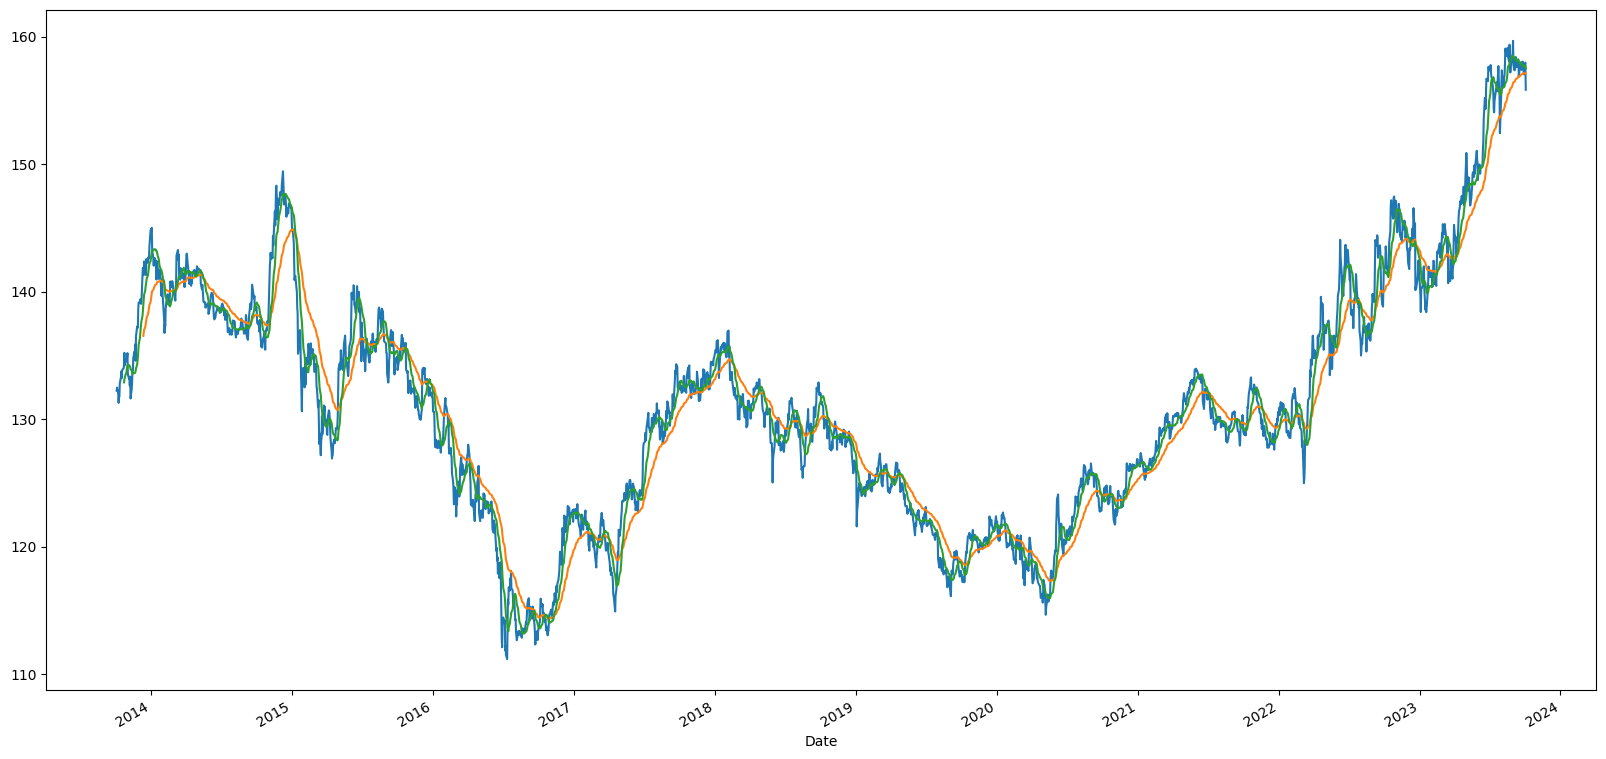

In [8]:
#plot a trend using the close column, analysing the time series data

data.Close.plot(figsize=[20,10])
data.Close.ewm(span=50,min_periods=50).mean().plot(figsize=[20,10]) #Exponential Moving Window
data.Close.rolling(14).mean().plot(figsize=[20,10])

In [9]:
# def macd_indicator(data,a,b,c):
#     """function to calculate MACD
#        typical values a = 12; b =26, c =9"""
#     data = data.copy()
#     data["MA_Fast"]=data["Close"].ewm(span=a,min_periods=a).mean()
#     data["MA_Slow"]=data["Close"].ewm(span=b,min_periods=b).mean()
#     data["MACD"]=data["MA_Fast"]-data["MA_Slow"]
#     data["Signal"]=data["MACD"].ewm(span=c,min_periods=c).mean()
#     return (data["MACD"],data["Signal"])

In [10]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-03,132.279007,133.173996,132.121002,132.250000,132.250000,0
2013-10-04,132.488007,132.645004,131.781006,132.481995,132.481995,0
2013-10-07,131.960007,131.964005,131.369995,132.009995,132.009995,0
2013-10-08,131.309998,132.009995,131.220001,131.289993,131.289993,0
2013-10-09,131.807007,132.153000,131.242004,131.766006,131.766006,0
...,...,...,...,...,...,...
2023-09-27,157.516998,157.598007,157.005005,157.516998,157.516998,0
2023-09-28,157.042007,157.860001,156.699997,157.042007,157.042007,0
2023-09-29,157.731003,158.302002,157.483002,157.731003,157.731003,0


In [11]:
data['Close']

Date
2013-10-03    132.250000
2013-10-04    132.481995
2013-10-07    132.009995
2013-10-08    131.289993
2013-10-09    131.766006
                 ...    
2023-09-27    157.516998
2023-09-28    157.042007
2023-09-29    157.731003
2023-10-02    157.962006
2023-10-03    155.837997
Name: Close, Length: 2607, dtype: float64

In [12]:
df = data.copy()

In [13]:
#reseting the index values

df= df.reset_index() 

In [14]:
#adding new columns

df['weekday'] = df.Date.dt.weekday
df['day'] = df.Date.dt.day
df['quarter'] = df.Date.dt.quarter
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

In [15]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,weekday,day,quarter,month,year
0,2013-10-03,132.279007,133.173996,132.121002,132.250000,132.250000,0,3,3,4,10,2013
1,2013-10-04,132.488007,132.645004,131.781006,132.481995,132.481995,0,4,4,4,10,2013
2,2013-10-07,131.960007,131.964005,131.369995,132.009995,132.009995,0,0,7,4,10,2013
3,2013-10-08,131.309998,132.009995,131.220001,131.289993,131.289993,0,1,8,4,10,2013
4,2013-10-09,131.807007,132.153000,131.242004,131.766006,131.766006,0,2,9,4,10,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
2602,2023-09-27,157.516998,157.598007,157.005005,157.516998,157.516998,0,2,27,3,9,2023
2603,2023-09-28,157.042007,157.860001,156.699997,157.042007,157.042007,0,3,28,3,9,2023
2604,2023-09-29,157.731003,158.302002,157.483002,157.731003,157.731003,0,4,29,3,9,2023
2605,2023-10-02,157.962006,158.442993,157.214996,157.962006,157.962006,0,0,2,4,10,2023


In [16]:
features = [ 'weekday', 'day', 'quarter', 'month', 'year' ]
target = 'Close'

In [17]:
X = df[features]  #input data
y = df[target]  #output data

In [18]:
X

,weekday,day,quarter,month,year
0,3,3,4,10,2013
1,4,4,4,10,2013
2,0,7,4,10,2013
3,1,8,4,10,2013
4,2,9,4,10,2013
...,...,...,...,...,...
2602,2,27,3,9,2023
2603,3,28,3,9,2023
2604,4,29,3,9,2023
2605,0,2,4,10,2023


In [19]:
y

0       132.250000
1       132.481995
2       132.009995
3       131.289993
4       131.766006
           ...    
2602    157.516998
2603    157.042007
2604    157.731003
2605    157.962006
2606    155.837997
Name: Close, Length: 2607, dtype: float64

In [20]:
#Dividing data into train & test for data model building

cutoff = int(df.shape[0]*0.8) #type casting

In [21]:
X_train = X.iloc[:cutoff]
X_test = X.iloc[cutoff:]

In [22]:
y_train = y.iloc[:cutoff]
y_test = y.iloc[cutoff:]

In [23]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [25]:
# it was observed that
# RF & DR shows more promissing accuracy accordinf to the charts below, compared to LR & RR(a variance of LR))

LR = LinearRegression()
RF = RandomForestRegressor()
RR = Ridge()
DR = DecisionTreeRegressor()

In [26]:
def modelprediction(RF):
    model = RF.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    y_train.plot(figsize = [20,10])
    y_test.plot(figsize = [20,10])
    pd.Series(y_pred,index = y_test.index).plot(figsize = [20,10])

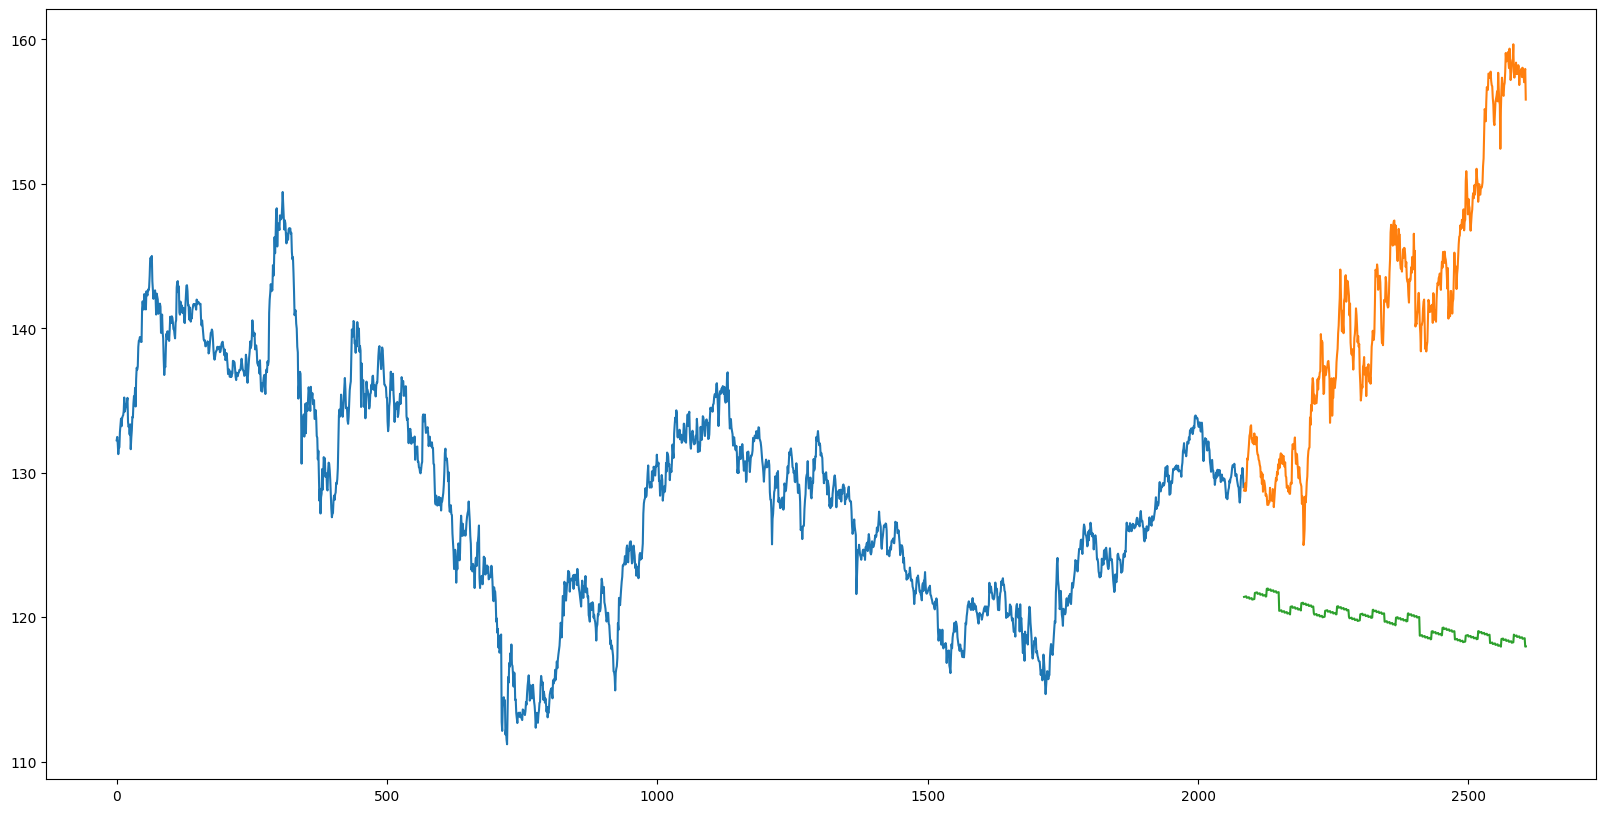

In [27]:
# I OBSERVED LOW ACCURACY PREDICTION

modelprediction(LR)

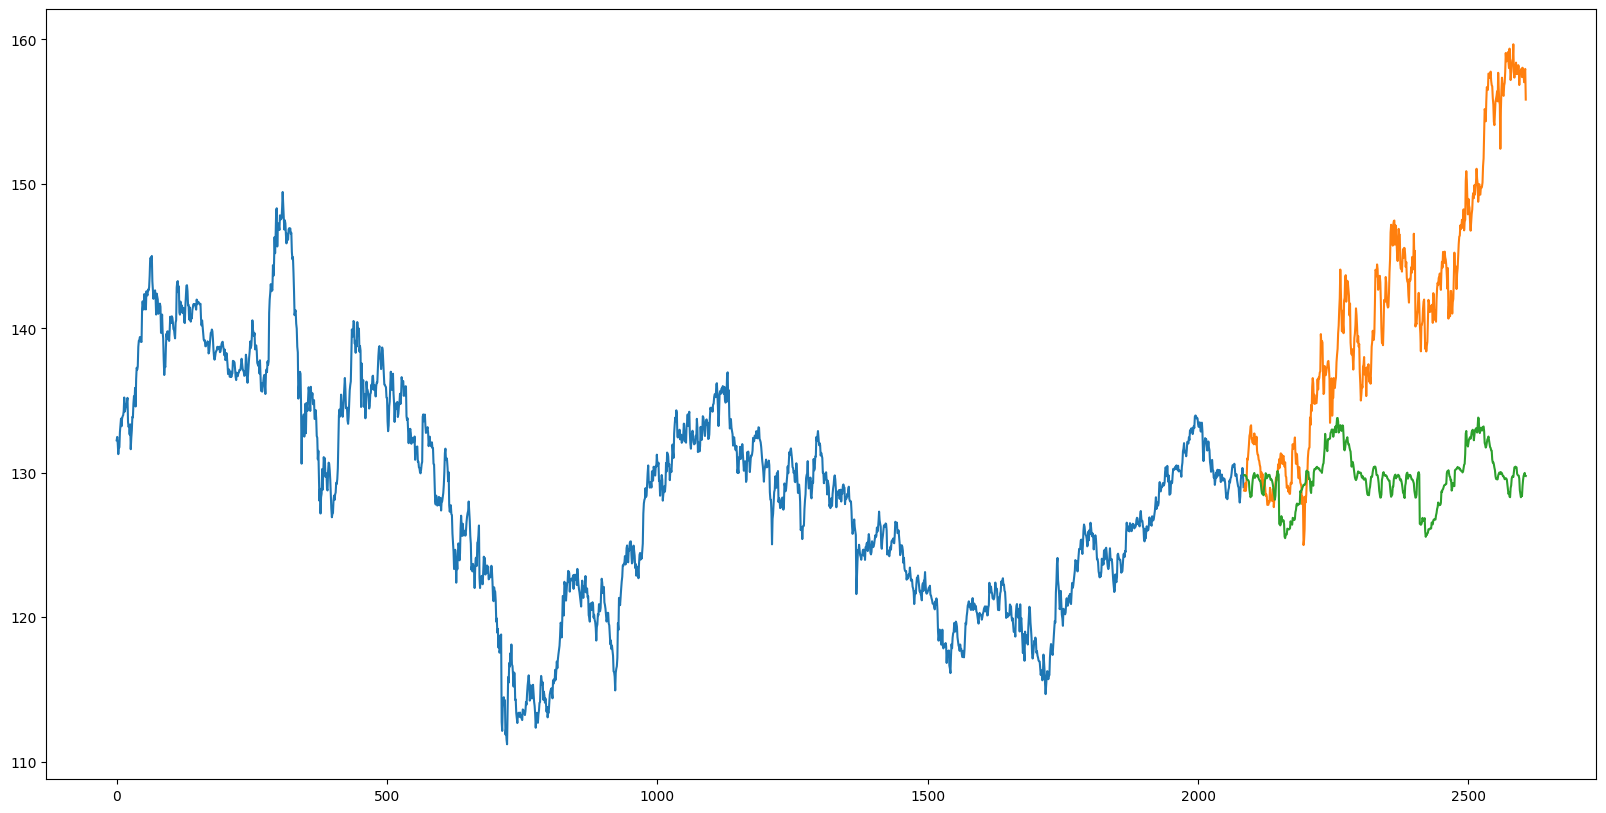

In [28]:
# I OBSERVED HIGH ACCURACY PREDICTION

modelprediction(RF)

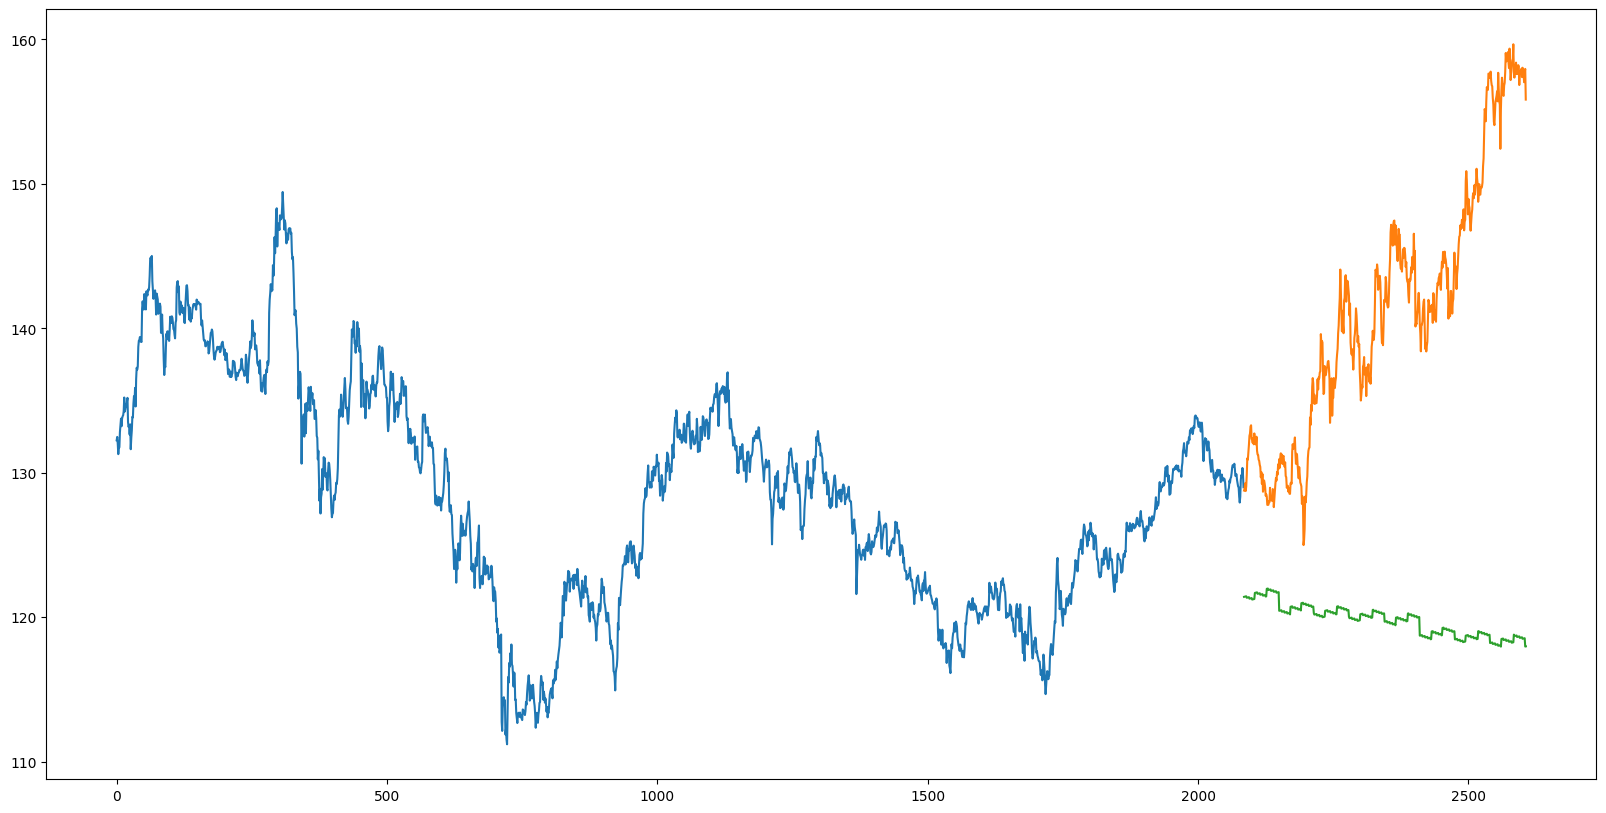

In [29]:
# I OBSERVED LOW ACCURACY PREDICTION.

modelprediction(RR)

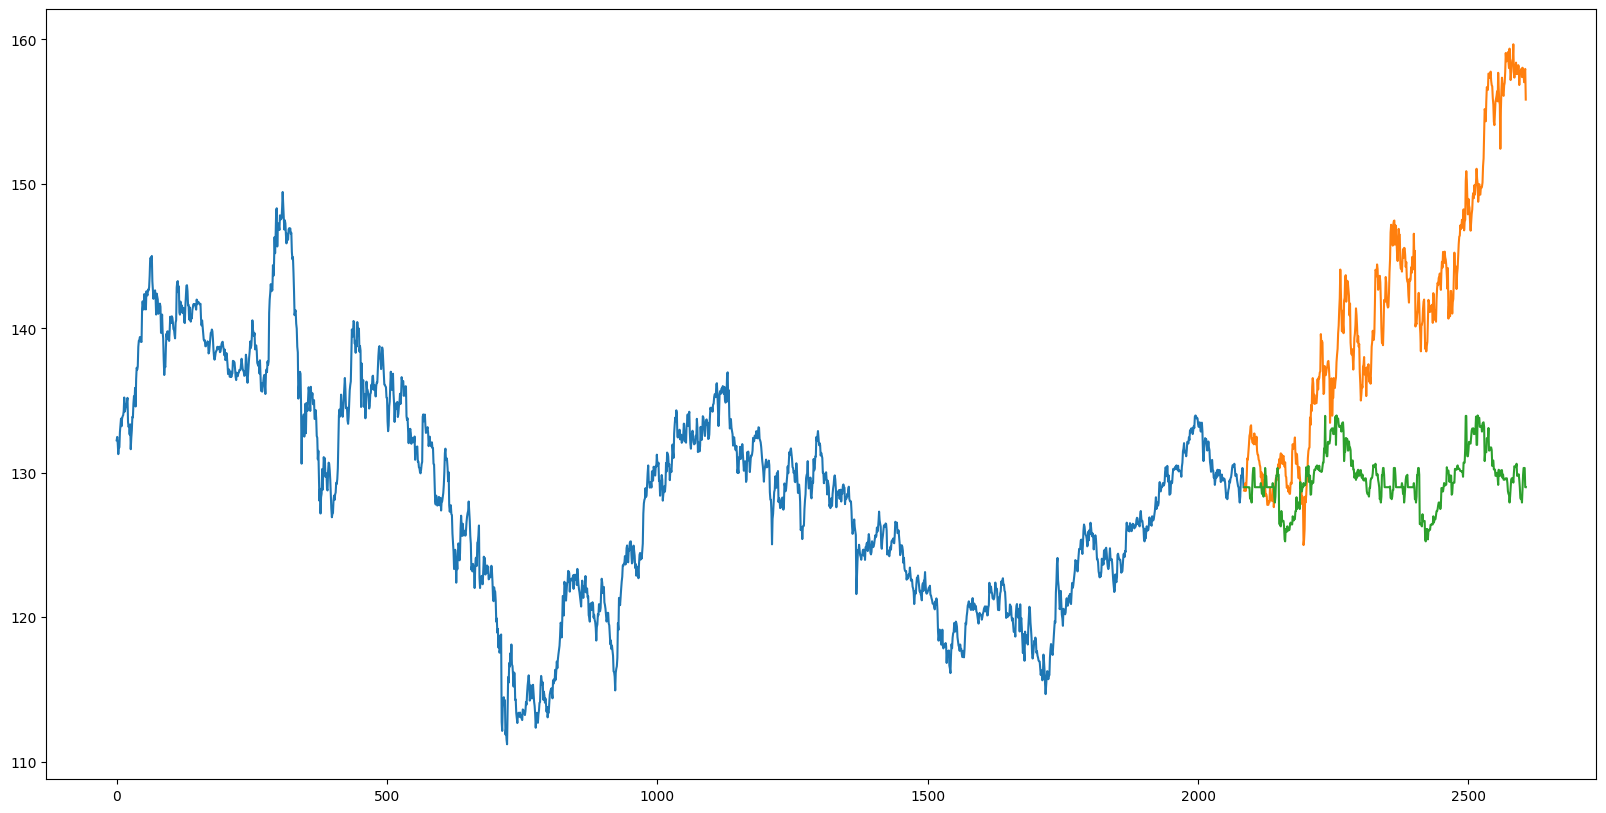

In [30]:
# I OBSERVED HIGH ACCURACY PREDICTION

modelprediction(DR)